<a href="https://colab.research.google.com/github/anushrao404/AIML-Internship_ElevateLabs/blob/main/26_5_25_AIML_Internship_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#Step 1: Load Dataset & Explore
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# View basic info
print(df.info())
print(df.head())
print("\nMissing Values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                      

In [12]:
#Step 2: Handle Missing Values
#Fill 'Age' with mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Drop 'Cabin' (too many nulls)
df = df.drop(columns=['Cabin'])

# Drop rows with missing 'Embarked'
df = df.dropna(subset=['Embarked'])

In [13]:
#Step 3: Encode Categorical Variables
# Convert 'Sex' to numeric (0 = male, 1 = female)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Confirm encoding
print(df[['Sex', 'Embarked_Q', 'Embarked_S']].head())


   Sex  Embarked_Q  Embarked_S
0    0       False        True
1    1       False       False
2    1       False        True
3    1       False        True
4    0       False        True


In [14]:
#Step 4: Normalize/Standardize Numeric Features
from sklearn.preprocessing import StandardScaler

# Select numeric columns to scale
numeric_cols = ['Age', 'Fare']

# Initialize scaler
scaler = StandardScaler()

# Apply scaler and replace original columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Check result
print(df[numeric_cols].describe())


                Age          Fare
count  8.890000e+02  8.890000e+02
mean   3.316932e-16  1.398706e-16
std    1.000563e+00  1.000563e+00
min   -2.255481e+00 -6.462044e-01
25%   -5.904949e-01 -4.872378e-01
50%    3.523727e-03 -3.551972e-01
75%    4.125086e-01 -2.207954e-02
max    3.884444e+00  9.668551e+00


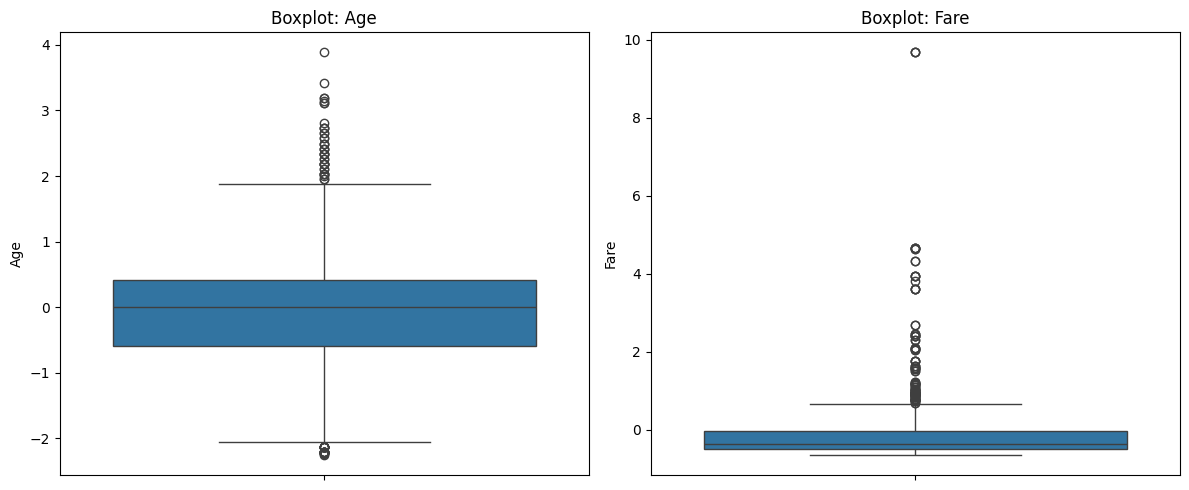


✅ Outliers removed. Final shape: (718, 12)


In [15]:
# Step 5: Detect and Handle Outliers
# Boxplots to visualize outliers
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y='Age', data=df)
plt.title('Boxplot: Age')

plt.subplot(1, 2, 2)
sns.boxplot(y='Fare', data=df)
plt.title('Boxplot: Fare')

plt.tight_layout()
plt.show()

# Remove outliers using IQR method
for col in ['Age', 'Fare']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("\n✅ Outliers removed. Final shape:", df.shape)


In [16]:
#Final Cleaned Data Preview
print(df.head())
print(df.info())


   PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                           Name  Sex       Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris    0 -0.590495      1      0   
2                        Heikkinen, Miss. Laina    1 -0.281878      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  0.412509      1      0   
4                      Allen, Mr. William Henry    0  0.412509      0      0   
5                              Moran, Mr. James    0  0.003524      0      0   

             Ticket      Fare  Embarked_Q  Embarked_S  
0         A/5 21171 -0.500240       False        True  
2  STON/O2. 3101282 -0.486650       False        True  
3            113803  0.422861       False        True  
4            373450 -0.484133       False        True  
5            330877 -0